In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [33]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Feature selection - standarisasi

In [4]:
from sklearn.preprocessing import StandardScaler

In [24]:
pd_ibl = pd.read_csv('ibl_player.csv')
pd_nba = pd.read_csv('nba_all_season.csv')

In [27]:
pd_ibl.head(2)

,Unnamed: 0,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277


In [55]:
pd_nba.drop(['Unnamed: 0','Unnamed: 0.1','team_abbreviation','college','country','season'],axis=1,inplace=True)

In [56]:
pd_nba.head()

,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player
0,Dennis Rodman,36.0,198.12,99.790240,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,Dwayne Schintzius,28.0,215.90,117.933920,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,Earl Cureton,39.0,205.74,95.254320,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,Ed O'Bannon,24.0,203.20,100.697424,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,Ed Pinckney,34.0,205.74,108.862080,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0


In [73]:
pd_nba.drop(pd_nba[pd_nba['draft_year']=='Undrafted'].index,inplace=True)

In [89]:
pd_nba.drop(pd_nba[pd_nba['draft_round']=='Undrafted'].index,inplace=True)

In [82]:
pd_nba.columns

Index(['player_name', 'age', 'player_height', 'player_weight', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'best_player'],
      dtype='object')

In [96]:
pd_nba[pd_nba['oreb_pct']=='Undrafted']

C:\Users\ryani\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player


In [9]:
pd_ibl.isna().any()

Unnamed: 0      False
name            False
club            False
country         False
age             False
height          False
weight          False
pts             False
reb             False
gp              False
draft_year      False
draft_round     False
draft_number    False
ast             False
net_rating      False
oreb_pct        False
dreb_pct        False
usg_pct         False
ts_pct          False
ast_pct         False
dtype: bool

In [226]:
scaler = StandardScaler()

In [319]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [320]:
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

In [230]:
X_train

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,-0.478481,-1.801536,-1.232924,-0.541144,-0.588079,-0.916218,0.930764,0.086361,-0.571655,1.886353,0.711360,-1.151205,-1.166766,-0.435943,-0.186243,1.357188
1,0.415299,1.037522,0.591169,-0.052543,1.365368,0.703036,-0.042585,-0.668746,0.293606,-0.762124,-0.322593,1.679907,1.208392,-0.378165,-0.370432,-0.843926
2,-0.925370,-0.098101,-0.685696,0.924661,-0.588079,-1.103055,1.015403,0.020700,-0.335675,-0.005416,-0.450606,-0.715649,-0.718309,-0.416684,-0.266826,-0.247565
3,1.085633,-0.098101,-1.123478,-0.418994,-0.588079,-0.916218,-0.381142,1.514499,-0.453665,1.345847,-0.361982,-0.860835,-1.166766,1.644049,-0.105660,1.064429
4,-0.701926,-1.517630,-1.561261,-0.296844,1.365368,1.699500,-1.904645,-1.029885,-1.004285,-0.383770,0.671972,0.034474,-0.369510,-0.551498,0.999477,1.086115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,1.979413,-0.949818,-0.649214,-2.373401,-0.588079,-0.667102,0.465249,-0.044962,-0.886295,0.859392,0.140224,-1.006020,-1.498955,-0.204833,-0.266826,1.107801
7161,-0.701926,-0.382007,-0.539769,1.046811,1.365368,1.948616,-1.608408,-1.144792,-1.161605,-0.870225,-2.488971,0.034474,-0.701700,-0.147055,-0.220778,-0.431895
7162,1.755968,0.753617,1.138397,0.191758,-0.588079,-1.227613,-1.227532,-0.734408,0.293606,-0.870225,0.209154,1.534722,0.494184,-1.090755,0.354814,-1.115000
7163,-0.925370,-2.085442,-1.780152,-0.541144,-0.588079,0.080246,-1.989284,-0.471762,-0.925625,0.102685,-0.834646,-1.030217,-1.116937,-0.782608,0.573539,0.587340


In [231]:
X_train.describe()

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03,7.165000e+03
mean,2.515163e-16,7.345136e-16,-8.889997e-16,-4.385001e-15,4.821451e-16,-1.166315e-16,1.060639e-16,6.565269e-17,-2.618670e-17,1.374840e-16,2.045352e-18,1.204278e-16,1.697642e-16,1.938319e-16,8.054347e-16,-9.464399e-17
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.042595e+00,-4.640594e+00,-3.202944e+00,-2.862003e+00,-5.880790e-01,-1.289892e+00,-2.285520e+00,-1.456684e+00,-1.515575e+00,-1.032377e+00,-1.434497e+01,-1.368983e+00,-2.412478e+00,-3.652227e+00,-5.919143e+00,-1.418602e+00
25%,-7.019256e-01,-6.659126e-01,-6.856960e-01,-7.854453e-01,-5.880790e-01,-7.916604e-01,-6.773783e-01,-7.836539e-01,-7.289749e-01,-7.080734e-01,-4.112174e-01,-8.124395e-01,-7.681376e-01,-6.863123e-01,-3.474088e-01,-7.029684e-01
50%,-2.550359e-01,1.858050e-01,4.394123e-02,6.960786e-02,-5.880790e-01,-1.688704e-01,2.536514e-01,-2.255310e-01,-2.176847e-01,-3.297196e-01,7.129408e-02,-2.800937e-01,-1.369768e-01,-7.001849e-02,1.130651e-01,-3.126229e-01
75%,6.387436e-01,7.536167e-01,7.735785e-01,8.025106e-01,1.365368e+00,6.407566e-01,8.884443e-01,5.788225e-01,4.902557e-01,3.729374e-01,5.045697e-01,7.120054e-01,6.602790e-01,6.233121e-01,5.159798e-01,4.897539e-01
max,3.766972e+00,3.308769e+00,4.348801e+00,2.024015e+00,1.308605e+01,8.923864e+00,1.269320e+00,4.469267e+00,4.895218e+00,5.291537e+00,9.514733e+00,1.072979e+01,9.446702e+00,1.079216e+01,6.329463e+00,9.424328e+00


In [232]:
X_train.corr()

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,0.001475,0.066284,-0.592956,0.025528,-0.034761,0.001065,-0.021515,0.014162,0.061240,0.107030,-0.062879,0.023331,-0.143332,0.009740,0.050579
player_height,0.001475,1.000000,0.821127,-0.038438,-0.049409,-0.106619,-0.039501,-0.093040,0.416722,-0.498206,-0.022896,0.615230,0.639384,-0.125083,0.059958,-0.642332
player_weight,0.066284,0.821127,1.000000,-0.084889,-0.033578,-0.098061,-0.023247,-0.061244,0.433036,-0.423803,-0.011274,0.631245,0.632413,-0.087438,0.044606,-0.562492
draft_year,-0.592956,-0.038438,-0.084889,1.000000,-0.012516,0.070477,-0.029656,0.009229,-0.038344,-0.027940,-0.051583,-0.093773,-0.013848,0.021655,0.100754,-0.029252
draft_round,0.025528,-0.049409,-0.033578,-0.012516,1.000000,0.854366,-0.187370,-0.269964,-0.227727,-0.169881,-0.074284,0.011150,-0.087934,-0.200165,-0.099965,-0.078391
draft_number,-0.034761,-0.106619,-0.098061,0.070477,0.854366,1.000000,-0.222911,-0.377416,-0.331665,-0.229764,-0.087564,-0.006781,-0.140142,-0.262917,-0.127466,-0.097351
gp,0.001065,-0.039501,-0.023247,-0.029656,-0.187370,-0.222911,1.000000,0.511268,0.436016,0.358046,0.294465,-0.027983,0.047594,0.144009,0.392344,0.145147
pts,-0.021515,-0.093040,-0.061244,0.009229,-0.269964,-0.377416,0.511268,1.000000,0.602880,0.644699,0.260828,-0.138972,0.037553,0.688405,0.391730,0.365846
reb,0.014162,0.416722,0.433036,-0.038344,-0.227727,-0.331665,0.436016,0.602880,1.000000,0.198675,0.221970,0.444502,0.641376,0.249846,0.322773,-0.075818
ast,0.061240,-0.498206,-0.423803,-0.027940,-0.169881,-0.229764,0.358046,0.644699,0.198675,1.000000,0.198275,-0.378749,-0.235323,0.409053,0.177716,0.847677


# Visualisation

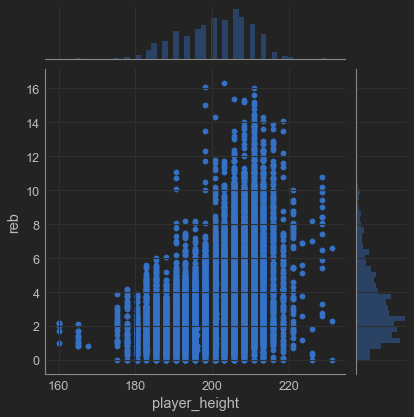

In [32]:
sns.jointplot(data=pd_nba,x='player_height',y='reb')
# hubungan antara pemain yang berpostur tinggi dengan rata-rata rebound per-game
# tinggi antara 200-220 memiliki rebound melebihi rata-rata

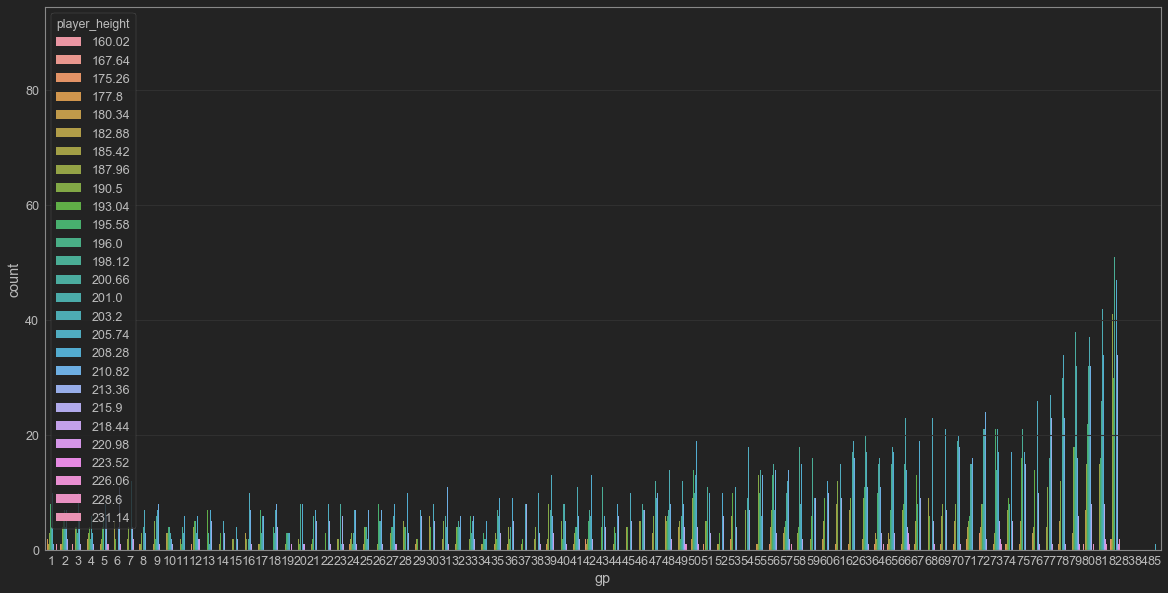

In [511]:
plt.figure(figsize=(20,10))
sns.countplot(data=pd_nba,x='gp',hue='player_height')
# pemain tinggi badan yang sering bermain dalam satu musim

In [48]:
pd_nba[pd_nba['best_player']==1]['age']

6        25.0
147      22.0
357      23.0
545      24.0
754      23.0
         ... 
10966    20.0
10991    25.0
11006    21.0
11018    21.0
11044    22.0
Name: age, Length: 224, dtype: float64

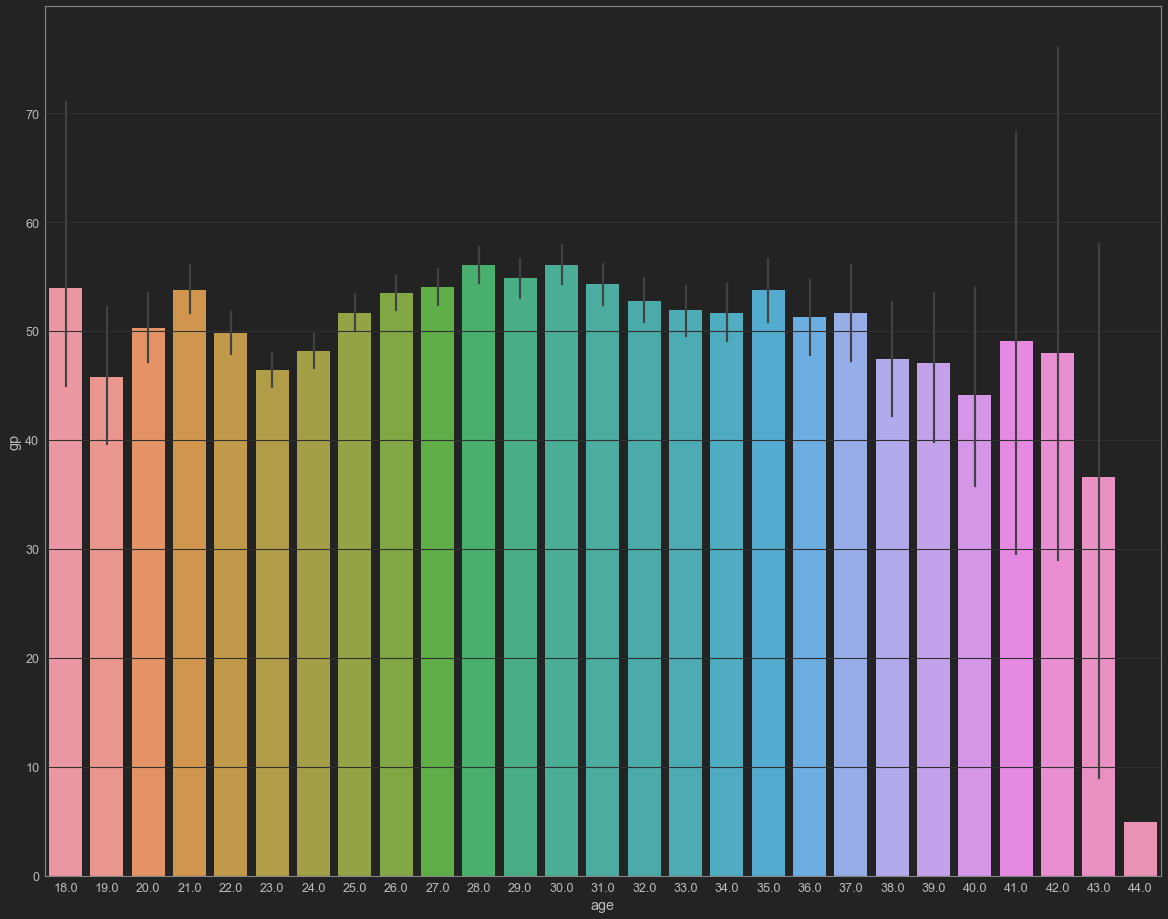

In [38]:
plt.figure(figsize=(20,16))
sns.barplot(data=pd_nba,x='age',y='gp')
# umur pemain nba terhadap banyaknya bermain per musim

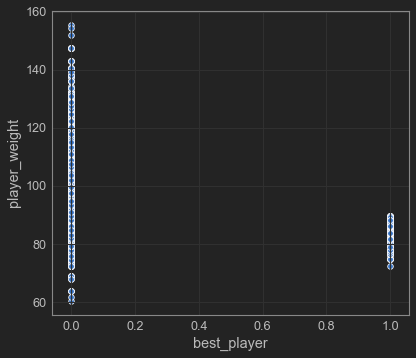

In [314]:
sns.scatterplot(data=pd_nba,y='player_weight',x='best_player')
# pemain terbaik memiliki rata-rata berat badan sekitar 70 - 90 kg

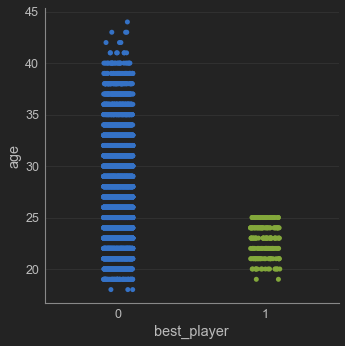

In [299]:
sns.catplot(data=pd_nba,x='best_player',y='age')
# rata-rata pemain terbaik bermumur dibwah/maksimal 25

# Training dataset

In [49]:
from sklearn.model_selection import train_test_split

C:\Users\ryani\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [76]:
pd_nba

,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player
0,Dennis Rodman,36.0,198.12,99.790240,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,Dwayne Schintzius,28.0,215.90,117.933920,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,Earl Cureton,39.0,205.74,95.254320,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,Ed O'Bannon,24.0,203.20,100.697424,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,Ed Pinckney,34.0,205.74,108.862080,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,Mason Plumlee,30.0,210.82,115.212368,2013,1,22,51,7.4,5.4,2.4,1.3,0.094,0.196,0.177,0.619,0.201,0
11135,Matisse Thybulle,23.0,195.58,91.171992,2019,1,20,56,4.6,1.5,1.2,1.2,0.031,0.047,0.111,0.522,0.085,0
11138,Maurice Harkless,26.0,200.66,99.790240,2012,1,15,59,5.7,3.9,1.0,1.9,0.038,0.119,0.104,0.575,0.059,0
11141,Melvin Frazier Jr.,23.0,195.58,97.522280,2018,2,35,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,0


In [277]:
X = pd_nba.drop(['player_name','best_player'],axis=1)
y = pd_nba['best_player']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=101)

In [99]:
X_train

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
1831,25.0,185.42,86.182480,1998,1,7,77,9.4,2.4,5.4,5.4,0.009,0.075,0.167,0.498,0.256
4618,29.0,210.82,108.862080,2002,2,33,54,4.8,4.6,0.5,-5.1,0.126,0.218,0.170,0.482,0.053
6589,23.0,200.66,92.986360,2010,1,4,79,9.0,3.0,1.9,-6.4,0.027,0.102,0.168,0.491,0.108
6053,32.0,200.66,87.543256,1999,1,7,46,18.1,2.7,4.4,-5.5,0.021,0.075,0.275,0.505,0.229
2574,24.0,187.96,82.100152,2000,2,49,10,2.6,1.3,1.2,5.0,0.058,0.123,0.161,0.601,0.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,36.0,193.04,93.439952,1983,1,11,66,8.6,1.6,3.5,-0.4,0.015,0.055,0.179,0.491,0.233
6782,24.0,198.12,94.800728,2011,2,53,17,1.9,0.9,0.3,-27.1,0.058,0.103,0.182,0.495,0.091
9566,35.0,208.28,115.665960,2004,1,2,26,4.4,4.6,0.3,0.3,0.120,0.175,0.133,0.545,0.028
1601,23.0,182.88,79.378600,1998,1,23,8,6.0,1.5,2.1,-10.3,0.014,0.078,0.149,0.564,0.185


In [233]:
y_train.value_counts()

0    6991
1     174
Name: best_player, dtype: int64

# Machine Learning Model

## LogisticRegression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [239]:
# log = LogisticRegression(penalty='none',class_weight='balanced',solver='newton-cg')
log.fit(X_train,y_train)
log_predict = log.predict(scaler.transform(X_test))
log_pobpred = log.predict_proba(X_test)
print(classification_report(y_test,log_predict))
print(confusion_matrix(y_test,log_predict))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1977
           1       0.26      0.95      0.40        44

    accuracy                           0.94      2021
   macro avg       0.63      0.95      0.69      2021
weighted avg       0.98      0.94      0.96      2021

[[1855  122]
 [   2   42]]


In [246]:
y_test_df = pd.DataFrame(y_test)

In [247]:
y_test_df['predict_log']=log_predict
y_test_df

,best_player,predict_log
10508,0,0
2192,0,0
8849,0,0
6747,0,0
3055,0,0
...,...,...
821,0,0
9644,0,1
9521,0,0
10557,0,0


## AdaBoost

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [154]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, algorithm='SAMME')

In [235]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=3,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [240]:
adapred=ada.predict(scaler.transform(X_test))

In [413]:
adaprob = ada.predict_proba(scaler.transform(X_test))

In [414]:
adaprob

array([[0.73105858, 0.26894142],
       [0.59531134, 0.40468866],
       [0.73105858, 0.26894142],
       ...,
       [0.72954479, 0.27045521],
       [0.59551216, 0.40448784],
       [0.59905111, 0.40094889]])

In [241]:
print(classification_report(y_test,adapred))
print(confusion_matrix(y_test,adapred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       1.00      0.98      0.99        44

    accuracy                           1.00      2021
   macro avg       1.00      0.99      0.99      2021
weighted avg       1.00      1.00      1.00      2021

[[1977    0]
 [   1   43]]


In [248]:
y_test_df['predict_ada']=adapred
y_test_df

,best_player,predict_log,predict_ada
10508,0,0,0
2192,0,0,0
8849,0,0,0
6747,0,0,0
3055,0,0,0
...,...,...,...
821,0,0,0
9644,0,1,0
9521,0,0,0
10557,0,0,0


## Gradient Boost

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [262]:
gradient = GradientBoostingClassifier(learning_rate = 0.1, subsample=0.6, n_estimators=600)
gradient.fit(X_train, y_train)
print(classification_report(y_test, gradient.predict(scaler.transform(X_test))))
print(confusion_matrix(y_test, gradient.predict(scaler.transform(X_test))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.98      1.00      0.99        44

    accuracy                           1.00      2021
   macro avg       0.99      1.00      0.99      2021
weighted avg       1.00      1.00      1.00      2021

[[1976    1]
 [   0   44]]


In [263]:
predGB = gradient.predict(scaler.transform(X_test))

In [324]:
probGB = gradient.predict_proba(scaler.transform(X_test))

In [264]:
y_test_df['predict_GB']=gradient.predict(X_test)
y_test_df

,best_player,predict_log,predict_ada,predict_GB
10508,0,0,0,0
2192,0,0,0,0
8849,0,0,0,0
6747,0,0,0,0
3055,0,0,0,0
...,...,...,...,...
821,0,0,0,0
9644,0,1,0,0
9521,0,0,0,0
10557,0,0,0,0


# Evaluation Matrix

In [171]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import auc,roc_curve

## Logistic Reg

In [252]:
#logisticRegression
print('Accuracy Score : ',accuracy_score(y_test_df['best_player'],y_test_df['predict_log']))
print('Recall Score : ',recall_score(y_test_df['best_player'],y_test_df['predict_log']))
print('Precision Score : ',precision_score(y_test_df['best_player'],y_test_df['predict_log']))
print('F1 Score : ',f1_score(y_test_df['best_player'],y_test_df['predict_log']))

Accuracy Score :  0.9386442355269669
Recall Score :  0.9545454545454546
Precision Score :  0.25609756097560976
F1 Score :  0.40384615384615385


In [317]:
logrfc1 = log_pobpred[:,1]
flog, tlog, threshold_rfsm1 = roc_curve(y_test, log_predict)
roc_auc_log = auc(flog, tlog)

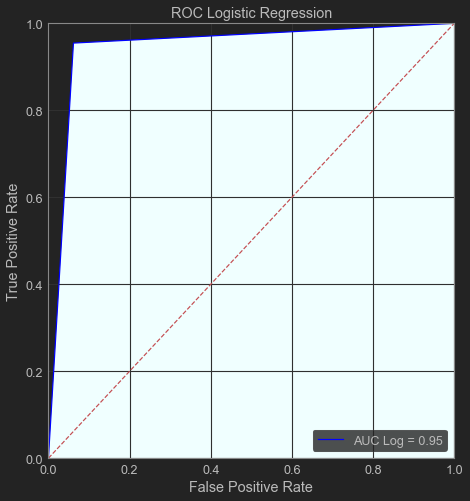

In [318]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('ROC Logistic Regression')
plt.plot(flog, tlog, 'blue', label='AUC Log = {}'.format(round(roc_auc_log,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(flog, tlog, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

## AdaBoost

In [255]:
y_test_df

,best_player,predict_log,predict_ada,predict_GB
10508,0,0,0,0
2192,0,0,0,0
8849,0,0,0,0
6747,0,0,0,0
3055,0,0,0,0
...,...,...,...,...
821,0,0,0,0
9644,0,1,0,0
9521,0,0,0,0
10557,0,0,0,0


In [256]:
print('Accuracy Score : ',accuracy_score(y_test_df['best_player'],y_test_df['predict_ada']))
print('Recall Score : ',recall_score(y_test_df['best_player'],y_test_df['predict_ada']))
print('Precision Score : ',precision_score(y_test_df['best_player'],y_test_df['predict_ada']))
print('F1 Score : ',f1_score(y_test_df['best_player'],y_test_df['predict_ada']))

Accuracy Score :  0.9995051954477981
Recall Score :  0.9772727272727273
Precision Score :  1.0
F1 Score :  0.9885057471264368


In [322]:
dtrog = adaprob[:,1]
fdt, tdt, threshold_dt = roc_curve(y_test, dtrog)
roc_auc_dt = auc(fdt, tdt)

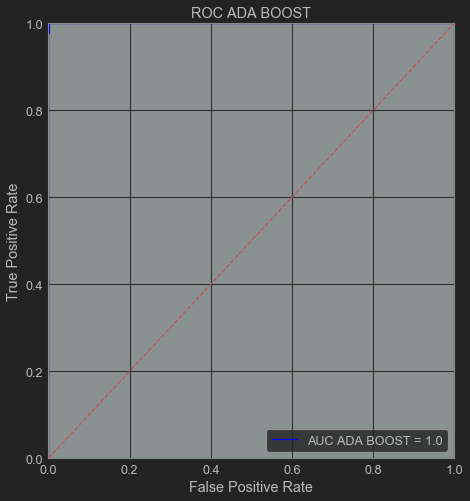

In [352]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('ROC ADA BOOST')
plt.plot(fdt, tdt, 'blue', label='AUC ADA BOOST = {}'.format(round(roc_auc_dt,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fdt, tdt, 0, facecolor='azure', alpha=0.5)
plt.legend(loc='lower right')

## Gradient Boost

In [355]:
print('Accuracy Score : ',accuracy_score(y_test_df['best_player'],y_test_df['predict_GB']))
print('Recall Score : ',recall_score(y_test_df['best_player'],y_test_df['predict_GB']))
print('Precision Score : ',precision_score(y_test_df['best_player'],y_test_df['predict_GB']))
print('F1 Score : ',f1_score(y_test_df['best_player'],y_test_df['predict_GB']))

Accuracy Score :  0.9782285997031173
Recall Score :  0.0
Precision Score :  0.0
F1 Score :  0.0


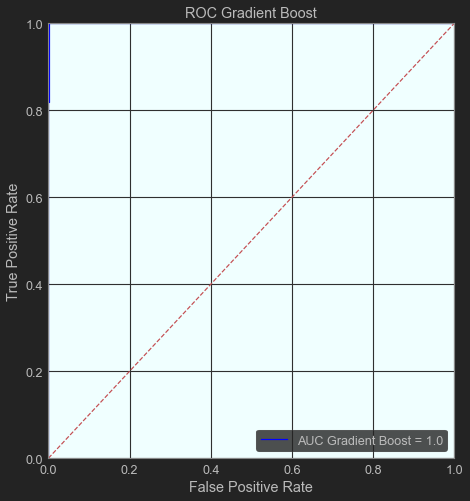

In [325]:
dtgb = probGB[:,1]
fgb, tgb, threshold_dt = roc_curve(y_test, dtgb)
roc_auc_gb = auc(fgb, tgb)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('ROC Gradient Boost')
plt.plot(fgb, tgb, 'blue', label='AUC Gradient Boost = {}'.format(round(roc_auc_gb,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fgb, tgb, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

Dalam model kali ini, akurasi positif-lah yang diprioritaskan. Maka, FALSE POSITIVE yang harus ditekan serendah mungkin karena kita ingin membuat tim yang sangat baik dengan tidak ada satu orangpun yang diprediksi dibawah standard masuk ke dalam tim.

# Oversampling / SMOTE

## SMOTE

In [191]:
from imblearn.over_sampling import SMOTE

C:\Users\ryani\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [199]:
smote = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [201]:
y_train_smote.value_counts()

1    6991
0    6991
Name: best_player, dtype: int64

In [202]:
adasmote = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, algorithm='SAMME')

In [203]:
adasmote.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=3,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [204]:
adapredsmote=adasmote.predict(X_test)
print(classification_report(y_test,adapredsmote))
print(confusion_matrix(y_test,adapredsmote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       1.00      0.98      0.99        44

    accuracy                           1.00      2021
   macro avg       1.00      0.99      0.99      2021
weighted avg       1.00      1.00      1.00      2021

[[1977    0]
 [   1   43]]


In [296]:
print(classification_report(y_test,adapred))
print(confusion_matrix(y_test,adapred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       1.00      0.98      0.99        44

    accuracy                           1.00      2021
   macro avg       1.00      0.99      0.99      2021
weighted avg       1.00      1.00      1.00      2021

[[1977    0]
 [   1   43]]


## OVERSAMPLING

In [279]:
dft = pd.concat([X_train,y_train],axis=1)

In [280]:
accept= dft[dft['best_player']==1]
decline=dft[dft['best_player']==0]

In [281]:
accept['best_player'].value_counts().unique()

array([174], dtype=int64)

In [282]:
decline['best_player'].value_counts().unique()

array([6991], dtype=int64)

In [284]:
from sklearn.utils import resample

accept_upsampled = resample(accept,replace=True, n_samples=len(decline),random_state=42)

In [285]:
accept_upsampled

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player
4792,24.0,190.50,83.914520,2005,1,24,80,10.9,3.2,2.4,2.5,0.016,0.115,0.184,0.584,0.155,1
6559,23.0,190.50,83.914520,2009,1,7,74,18.6,3.9,5.8,-0.6,0.023,0.109,0.242,0.595,0.268,1
545,24.0,195.58,81.192968,1996,1,8,77,17.2,4.7,2.3,1.9,0.051,0.100,0.210,0.525,0.104,1
7508,22.0,190.50,88.450440,2012,1,6,82,19.0,3.1,6.5,-2.1,0.015,0.079,0.241,0.546,0.280,1
8707,23.0,203.20,89.811216,2013,1,3,75,11.6,5.2,1.6,0.6,0.047,0.148,0.160,0.564,0.076,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,24.0,195.58,86.182480,2000,1,8,80,17.3,3.5,5.1,-5.8,0.017,0.094,0.257,0.486,0.270,1
6979,20.0,190.50,86.636072,2011,1,1,51,18.5,3.7,5.4,-5.6,0.031,0.112,0.281,0.566,0.324,1
10405,25.0,195.58,83.914520,2015,1,28,1,17.0,3.0,3.0,52.8,0.037,0.050,0.226,0.612,0.150,1
6677,25.0,187.96,83.914520,2009,1,29,81,10.6,3.0,3.0,2.6,0.036,0.104,0.199,0.534,0.202,1


In [286]:
df_over = pd.concat([decline,accept_upsampled])

In [293]:
df_over['best_player'].value_counts()

1    6991
0    6991
Name: best_player, dtype: int64

In [288]:
Xo = df_over.drop('best_player',axis=1)
yo = df_over['best_player']

In [218]:
# X_tover, X_testover, y_tover, y_testover = train_test_split(X, y, test_size=0.22, random_state=101)

In [294]:
adaover = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, algorithm='SAMME')
adaover.fit(Xo,yo)
adapredover=adaover.predict((X_test))

In [295]:
print(classification_report(y_test,adapredover))
print(confusion_matrix(y_test,adapredover))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       1.00      0.98      0.99        44

    accuracy                           1.00      2021
   macro avg       1.00      0.99      0.99      2021
weighted avg       1.00      1.00      1.00      2021

[[1977    0]
 [   1   43]]


In [297]:
print(classification_report(y_test,adapred))
print(confusion_matrix(y_test,adapred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       1.00      0.98      0.99        44

    accuracy                           1.00      2021
   macro avg       1.00      0.99      0.99      2021
weighted avg       1.00      1.00      1.00      2021

[[1977    0]
 [   1   43]]


## Tidak ada perbedaan antara training data normal(original) dan training data yang sudah di-oversampling/SMOTE

# THRESHOLDS 

In [326]:
from sklearn.metrics import precision_recall_curve 

In [327]:
precision, recall, thresholds = precision_recall_curve(y_test, adapred) 
thresholds = np.append(thresholds, 1) 

Text(0, 0.5, '%')

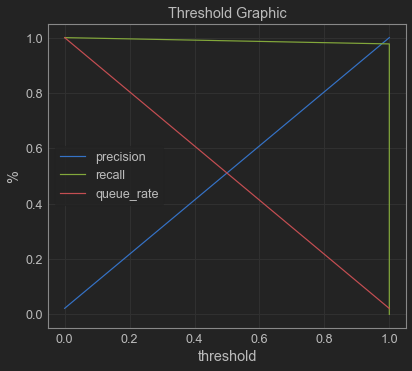

In [330]:
queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((adapred >= threshold).mean()) 
    
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 

leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.title('Threshold Graphic')
plt.xlabel('threshold') 
plt.ylabel('%')

In [331]:
fscore = (2 * precision * recall) / (precision + recall)
fscore

array([0.04261501, 0.98850575, 0.        ])

In [477]:
trhl = []
pres = []
recc = []
op = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for h in op:
    trhl.append(h)
    preprob_ovs = []
    for i in adaprob[:,0]:
        if i > h:
            preprob_ovs.append(0)
        else:
            preprob_ovs.append(1)
    
    pres.append(precision_score(y_test,preprob_ovs))
    recc.append(recall_score(y_test,preprob_ovs))
trhlout = pd.DataFrame(trhl)


,0
0,0.000000
1,0.100000
2,0.200000
3,0.300000
4,0.400000
5,0.500000
6,0.600000
7,0.700000
8,0.800000
9,0.900000


In [502]:
trhlout.rename(columns={0:'Threshold'},inplace=True)

In [504]:
trhlout['Precision']=pres

In [506]:
trhlout['Recall']=recc
trhlout

,Threshold,Precision,Recall
0,0.0,0.000000,0.000000
1,0.1,0.000000,0.000000
2,0.2,0.000000,0.000000
3,0.3,0.000000,0.000000
4,0.4,0.000000,0.000000
5,0.5,1.000000,0.977273
6,0.6,0.199095,1.000000
7,0.7,0.104019,1.000000
8,0.8,0.021771,1.000000
9,0.9,0.021771,1.000000


## dari graphic, disimpulkan 0.5 tetap yang paling baik karena sumbu recall dan queue_reate bertabrakan di tengah, akan menghasilkan prediksi untuk 0 yang tidak seimbang

# Test Data

In [374]:
from sklearn import metrics

In [346]:
pd_ibl.drop(['Unnamed: 0','club','country'],axis=1,inplace=True)

In [455]:
pd_ibl.head(2)

,name,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Andakara Prastawa Dyaksa,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,Reggie Mononimbar,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277


In [456]:
pd_nba.head(2)

,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player
0,Dennis Rodman,36.0,198.12,99.79024,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,Dwayne Schintzius,28.0,215.90,117.93392,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0


In [457]:
pd_ibl.rename(columns={'height':'player_height','weight':'player_weight'},inplace=True)

In [459]:
pd_ibl.head()

,name,age,player_height,player_weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Andakara Prastawa Dyaksa,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,Reggie Mononimbar,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,Hardianus Lakudu,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,Kevin Yonas Sitorus,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,Arki Dikania Wisnu,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143


In [460]:
ibl_test = pd_ibl.drop(['name'],axis=1)

In [462]:
ibl_test

,age,player_height,player_weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143
5,21,191,85,4,10,49,2018,4,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238
6,25,188,90,7,5,20,2015,6,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226
7,23,179,87,1,2,31,2018,5,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189
8,21,177,80,9,8,24,2018,2,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220
9,24,182,85,6,5,36,2017,8,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237


In [465]:
xx=ada.predict(ibl_test)
xx = pd.DataFrame(xx)

In [466]:
pd_ibl['prediction']=xx
pd_ibl

,name,age,player_height,player_weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,prediction
0,Andakara Prastawa Dyaksa,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237,0
1,Reggie Mononimbar,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277,0
2,Hardianus Lakudu,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352,0
3,Kevin Yonas Sitorus,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071,0
4,Arki Dikania Wisnu,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143,0
5,Laurentius Steven Oei,21,191,85,4,10,49,2018,4,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238,0
6,Mei Joni,25,188,90,7,5,20,2015,6,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226,0
7,Vincent Rivaldi Kosasih,23,179,87,1,2,31,2018,5,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189,0
8,Hardian Wicaksono,21,177,80,9,8,24,2018,2,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220,0
9,Brandon Jawato,24,182,85,6,5,36,2017,8,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237,0


## sesuai dengan model training yang diambil dari data NBA, maka pemain yang ada di list IBA = TIDAK SATUPUN YANG DIPREDIKSI AKAN DITERIMA